In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss


In [106]:
covertype_path = '/media/ronit/04101CEC101CE708/UCSD Spring 2017/CSE 291/Homework2/covtype.data'

names = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
]

Wilderness_Area = []
for i in range(4):
    Wilderness_Area.append('Wilderness_Area_{}'.format(i+1))

Soil_Type = []
for i in range(40):
    Soil_Type.append('Soil_Type_{}'.format(i+1))

names.extend(Wilderness_Area + Soil_Type + ['Cover_Type'])
covertype_df = pd.read_csv(covertype_path, names=names)

In [107]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')

In [108]:
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [109]:
covertype_df.shape

(581012, 55)

In [110]:
rows=range(0,581012,10)
covertype_df= covertype_df.ix[rows]

In [111]:
covertype_df.shape

(58102, 55)

In [112]:
X = covertype_df.drop('Cover_Type',axis=1)
y = covertype_df['Cover_Type']

In [113]:
columnlabel=X.columns.values.tolist()
len(columnlabel)

54

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, random_state=42)

In [115]:
importances=avg_imp[111]

In [116]:
indices = np.argsort(importances)[::-1]
importances=np.sort(importances)[::-1]
columnlabel=[columnlabel[i] for i in indices]
columnlabel=columnlabel[:25]

In [117]:
columnlabel

['Horizontal_Distance_To_Fire_Points',
 'Elevation',
 'Horizontal_Distance_To_Roadways',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Aspect',
 'Wilderness_Area_4',
 'Horizontal_Distance_To_Hydrology',
 'Hillshade_3pm',
 'Hillshade_Noon',
 'Slope',
 'Soil_Type_38',
 'Soil_Type_12',
 'Soil_Type_10',
 'Soil_Type_23',
 'Soil_Type_4',
 'Wilderness_Area_1',
 'Wilderness_Area_3',
 'Soil_Type_1',
 'Soil_Type_39',
 'Wilderness_Area_2',
 'Soil_Type_40',
 'Soil_Type_22',
 'Soil_Type_29',
 'Soil_Type_2']

In [118]:
X_train=X_train[:,indices[:25]]
X_test=X_test[:,indices[:25]]

In [119]:
X_test.shape

(14526, 25)

In [120]:
max(y_train)

7

In [121]:
X_train[:2]

array([[1465, 2898, 1550,   43,  244,   97,    0,  192,   96,  215,   16,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    1,    0],
       [1489, 3226, 4890,   68,  244,   83,    0,  124,   19,  162,   34,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0]])

In [122]:
n_features=int(np.sqrt(25))

In [123]:
from collections import defaultdict
from scipy import stats
import sklearn.utils 

avg_imp = {}
test_accuracy={}
out_accuracy={}
train_accuracy={}
train_pre_forest={}
test_pre_forest={}

for n_trees in range(1,121,10):
    
    X={}
    y={}
    clf={}
    feature_imp = defaultdict(list)
    features_index={}
    test_pre_tree={}
 
    data_index={}
    train_pre=[]
    train_pre_tree={}

    for i in range(1,n_trees+1):
        
        data_index[i]=np.random.randint(0,len(X_train), size=int(0.70*len(X_train)))
        features_index[i]=np.random.randint(0,25, size=(int(n_features)))
        y[i]=y_train[data_index[i]]
        temp=X_train[data_index[i],:]
        X[i]=temp[:,features_index[i]]
        clf[i] = DecisionTreeClassifier(max_depth=None,random_state=42)
        clf[i].fit(X[i],y[i])
        imp=clf[i].feature_importances_ 
        test_pre_tree[i]=clf[i].predict(X_test[:,features_index[i]])
        train_pre_tree[i]=clf[i].predict(X_train[:,features_index[i]])
        
        
        iti=0;
        
        for j in features_index[i]:
            feature_imp[j].append(imp[iti])
            iti=iti+1;
         
    avg_imp[n_trees]=[np.mean(feature_imp[j]) for j in range(0,25)]
    
    
    #Classification Test Error
    test_pre=[]
    
    for j in range(len(y_test)):
        temp=[];
        for i in range(1,n_trees+1):
            t=test_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        test_pre.append(a[0])
        
        
    test_accuracy[n_trees]=accuracy_score(y_test, test_pre) 
    test_pre_forest[n_trees]=test_pre
    
    #print(n_trees," test_accuracy  ", test_accuracy[n_trees])
    
    
    
    #Out of Bag Accuracy

    
    to=0;
    ind=0
    right=0
    for j in range(len(X_train)):
    
        out_trees_pre=[]
        for i in range(1,n_trees+1):
            if j not in data_index[i]:
                te=X_train[j,features_index[i]]
                te = np.array(te).reshape((1, -1))
                out_trees_pre.append(clf[i].predict(te))
        if len(out_trees_pre) != 0:
            a,b=stats.mode(out_trees_pre)
            to=to+1;
            if a[0]==y_train[ind]:
                right=right+1;
        ind=ind+1 
        
    out_accuracy[n_trees]=right/to;
    
    
    #print(n_trees," out_accuracy   ", out_accuracy[n_trees])  
        
    
    # Training Error

    
    for j in range(len(y_train)):
        temp=[];
        for i in range(1,n_trees+1):
            t=train_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        train_pre.append(a[0]) 
        
    train_accuracy[n_trees]=accuracy_score(y_train, train_pre) 
    train_pre_forest[n_trees]=train_pre
    
    print(n_trees,"train_accuracy", train_accuracy[n_trees])  

/home/ronit/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ronit/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1 train_accuracy 0.542225078025
11 train_accuracy 0.774944923811
21 train_accuracy 0.90995043143
31 train_accuracy 0.911946943272
41 train_accuracy 0.739099504314
51 train_accuracy 0.86242427024
61 train_accuracy 0.88863135671
71 train_accuracy 0.876927666605
81 train_accuracy 0.831122636314
91 train_accuracy 0.909239030659
101 train_accuracy 0.86765650817
111 train_accuracy 0.847920873876


In [124]:
train_accuracy_array=[]
test_accuracy_array=[]
out_accuracy_array=[]

for i in range(1,121,10):
    train_accuracy_array.append(train_accuracy[i])
    test_accuracy_array.append(test_accuracy[i])
    out_accuracy_array.append(out_accuracy[i])

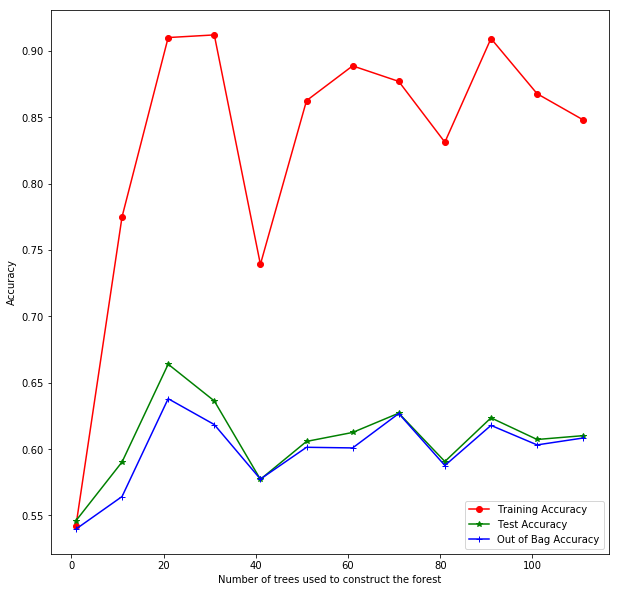

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(range(1,121,10),train_accuracy_array,marker='o',color='r',label='Training Accuracy')
plt.plot(range(1,121,10),test_accuracy_array,marker='*',color='g',label='Test Accuracy')
plt.plot(range(1,121,10),out_accuracy_array,marker='+',color='b',label='Out of Bag Accuracy')



plt.xlabel('Number of trees used to construct the forest')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

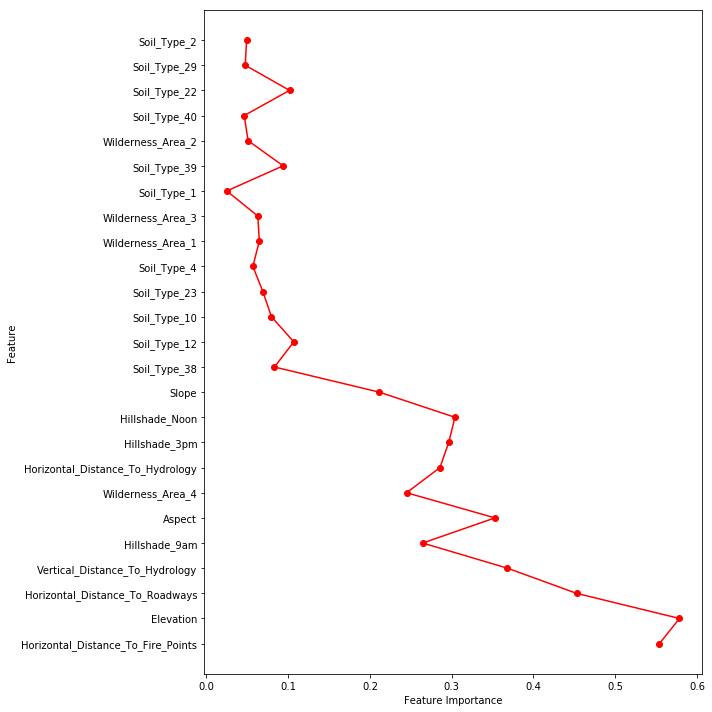

In [127]:
importances=avg_imp[111]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(avg_imp[111],range(25),marker='o',color='r')
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.yticks(range(len(importances)), columnlabel)
plt.tight_layout()
plt.show()

In [43]:
temp=[columnlabel[i] for i in indices]

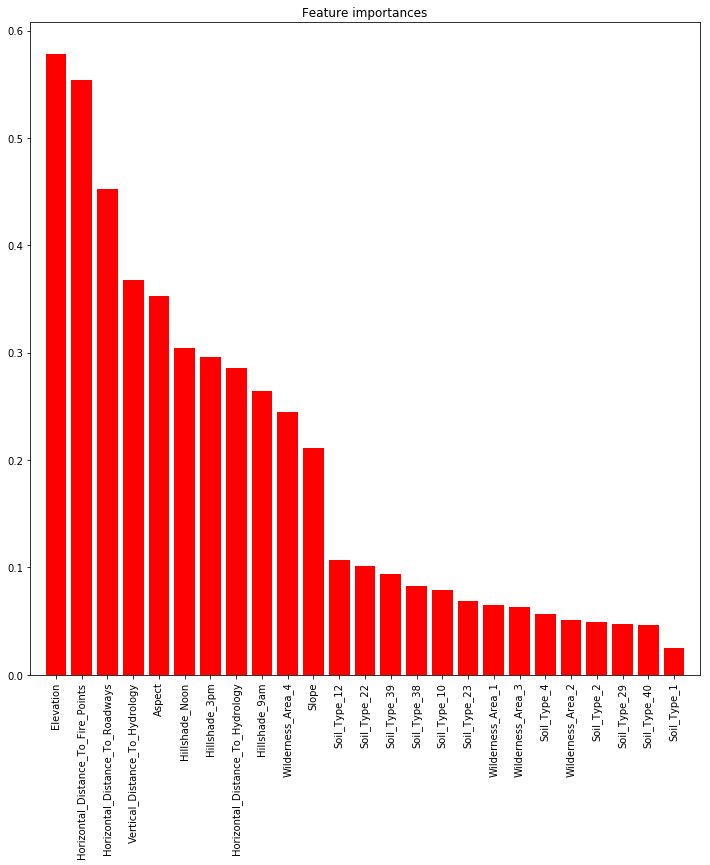

In [128]:

importances=avg_imp[111]
indices = np.argsort(importances)[::-1]
importances=np.sort(importances)[::-1]
temp=[columnlabel[i] for i in indices]

# Plot the feature importances of the forest
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances,
       color="r", align="center")
plt.xticks(range(len(importances)), temp,rotation='vertical')
plt.xlim([-1, len(importances)])
plt.ylim(ymin=0)
plt.show()

In [48]:
importances

array([  6.76594527e-01,   6.06645553e-01,   5.48014636e-01,
         4.50102598e-01,   4.28227658e-01,   4.10468722e-01,
         3.92294425e-01,   3.59342733e-01,   3.17789197e-01,
         2.97794134e-01,   2.94831841e-01,   2.15280149e-01,
         1.91289088e-01,   1.61012023e-01,   1.50017716e-01,
         1.47101645e-01,   1.24859262e-01,   9.96837163e-02,
         9.60123562e-02,   9.18415439e-02,   9.09824955e-02,
         8.26800288e-02,   8.14082209e-02,   5.08920593e-02,
         5.07776136e-02,   4.64312379e-02,   4.41468060e-02,
         3.60891645e-02,   3.01118087e-02,   2.89339243e-02,
         2.75642712e-02,   2.69288151e-02,   2.49487443e-02,
         2.34367444e-02,   2.32307613e-02,   2.29615001e-02,
         2.07051190e-02,   2.01581438e-02,   1.66814421e-02,
         1.44097950e-02,   1.44057748e-02,   1.42620580e-02,
         1.19543005e-02,   1.00773558e-02,   9.81124781e-03,
         9.21673653e-03,   8.87555542e-03,   6.64846299e-03,
         3.94944447e-03,

In [31]:
import itertools   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [129]:
cnf_matrix = confusion_matrix(y_test, test_pre_forest[111],labels=range(1,8))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(1,8),
                      title='Confusion matrix, without normalization')


Confusion matrix, without normalization
[[1662 3626    0    0    0    0    0]
 [ 273 6827   18    0    0    0    0]
 [   1  553  350    0    0    0    0]
 [   3   36   20    0    0    0    0]
 [   3  236    0    0    0    0    0]
 [   2  339   91    0    0    1    0]
 [ 195  268    0    0    0    0   22]]


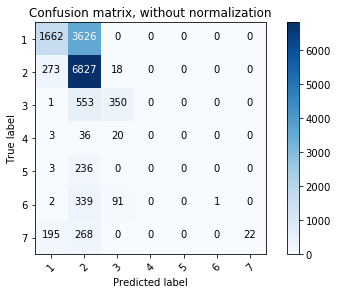

In [130]:
plt.show()

In [131]:
cnf_matrix = confusion_matrix(y_train, train_pre_forest[111],labels=range(1,8))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(1,8),
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[12337  3572     0     0     0     0     0]
 [   15 21175     0     0     0     0     0]
 [    0   751  1923     0     0     0     0]
 [    0    78    11   118     0     0     0]
 [    7   704     0     0     8     0     0]
 [    2   689    31     0     0   597     0]
 [  203   564     0     0     0     0   791]]


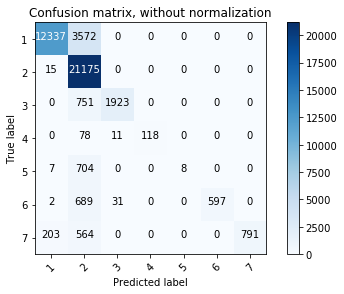

In [132]:
plt.show()

In [133]:
avg_imp_10 = {}
test_accuracy_10={}
out_accuracy_10={}
train_accuracy_10={}
train_pre_forest_10={}
test_pre_forest_10={}
    
for n_trees in range(1,121,10):
    
    X={}
    y={}
    clf={}
    feature_imp = defaultdict(list)
    features_index={}
    test_pre_tree={}

    data_index={}
    train_pre=[]
    train_pre_tree={}

    for i in range(1,n_trees+1):
        
        data_index[i]=np.random.randint(0,len(X_train), size=int(0.70*len(X_train)))
        features_index[i]=np.random.randint(0,25, size=(int(n_features)))
        y[i]=y_train[data_index[i]]
        temp=X_train[data_index[i],:]
        X[i]=temp[:,features_index[i]]
        clf[i] = DecisionTreeClassifier(max_depth=10,random_state=42)
        clf[i].fit(X[i],y[i])
        imp=clf[i].feature_importances_ 
        test_pre_tree[i]=clf[i].predict(X_test[:,features_index[i]])
        train_pre_tree[i]=clf[i].predict(X_train[:,features_index[i]])
        
        
        iti=0;
        
        for j in features_index[i]:
            feature_imp[j].append(imp[iti])
            iti=iti+1;
            
    avg_imp_10[n_trees]=[np.mean(feature_imp[j]) for j in range(0,25)]
    
    
    #Classification Test Error
    test_pre=[]
    
    for j in range(len(y_test)):
        temp=[];
        for i in range(1,n_trees+1):
            t=test_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        test_pre.append(a[0])
        
        
    test_accuracy_10[n_trees]=accuracy_score(y_test, test_pre) 
    test_pre_forest_10[n_trees]=test_pre
    
    print(n_trees," test_accuracy  ", test_accuracy[n_trees])
    
    
    
    #Out of Bag Accuracy

    
    to=0;
    ind=0
    right=0
    for j in range(len(X_train)):
    
        out_trees_pre=[]
        for i in range(1,n_trees+1):
            if j not in data_index[i]:
                te=X_train[j,features_index[i]]
                te = np.array(te).reshape((1, -1))
                out_trees_pre.append(clf[i].predict(te))
        if len(out_trees_pre) != 0:
            a,b=stats.mode(out_trees_pre)
            to=to+1;
            if a[0]==y_train[ind]:
                right=right+1;
        ind=ind+1 
        
    out_accuracy_10[n_trees]=right/to;
    
    
    print(n_trees," out_accuracy   ", out_accuracy[n_trees])  
        
    
    # Training Error

    
    for j in range(len(y_train)):
        temp=[];
        for i in range(1,n_trees+1):
            t=train_pre_tree[i]
            temp.append(t[j])
        a,b=stats.mode(temp)
        train_pre.append(a[0]) 
        
    train_accuracy_10[n_trees]=accuracy_score(y_train, train_pre) 
    train_pre_forest_10[n_trees]=train_pre
    
    print(n_trees,"train_accuracy", train_accuracy[n_trees])  

/home/ronit/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ronit/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1  test_accuracy   0.545986506953
1  out_accuracy    0.5396927902578532
1 train_accuracy 0.542225078025
11  test_accuracy   0.590251961999
11  out_accuracy    0.5642250287026407
11 train_accuracy 0.774944923811
21  test_accuracy   0.663912983616
21  out_accuracy    0.637919955939049
21 train_accuracy 0.90995043143
31  test_accuracy   0.636238468952
31  out_accuracy    0.6184367541766109
31 train_accuracy 0.911946943272
41  test_accuracy   0.577171967507
41  out_accuracy    0.5773590967505049
41 train_accuracy 0.739099504314
51  test_accuracy   0.605741429162
51  out_accuracy    0.6013172388470718
51 train_accuracy 0.86242427024
61  test_accuracy   0.612487952637
61  out_accuracy    0.600835322195704
61 train_accuracy 0.88863135671
71  test_accuracy   0.627013630731
71  out_accuracy    0.6267440793097118
71 train_accuracy 0.876927666605
81  test_accuracy   0.590596172381
81  out_accuracy    0.5875940884890766
81 train_accuracy 0.831122636314
91  test_accuracy   0.623502684841
91  out_ac

In [136]:
train_accuracy_array=[]
test_accuracy_array=[]
out_accuracy_array=[]

for i in range(1,121,10):
    train_accuracy_array.append(train_accuracy_10[i])
    test_accuracy_array.append(test_accuracy_10[i])
    out_accuracy_array.append(out_accuracy_10[i])

In [140]:
train_accuracy_10

{1: 0.53428492748301815,
 11: 0.60955571874426284,
 21: 0.57311364053607494,
 31: 0.61315861942353589,
 41: 0.63043877363686429,
 51: 0.57944740223976499,
 61: 0.54773269689737469,
 71: 0.59202313199926571,
 81: 0.60517257205801356,
 91: 0.54373967321461358,
 101: 0.57896548558839733,
 111: 0.58991187809803558}

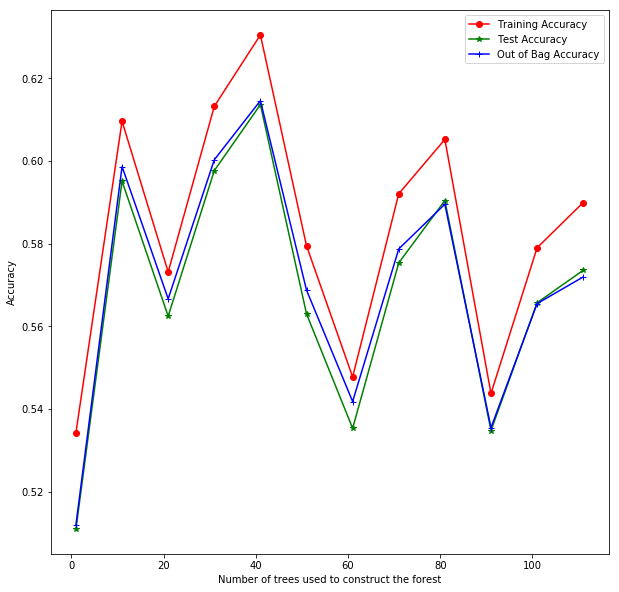

In [141]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(range(1,121,10),train_accuracy_array,marker='o',color='r',label='Training Accuracy')
plt.plot(range(1,121,10),test_accuracy_array,marker='*',color='g',label='Test Accuracy')
plt.plot(range(1,121,10),out_accuracy_array,marker='+',color='b',label='Out of Bag Accuracy')



plt.xlabel('Number of trees used to construct the forest')
plt.ylabel('Accuracy')

plt.legend()

plt.show()

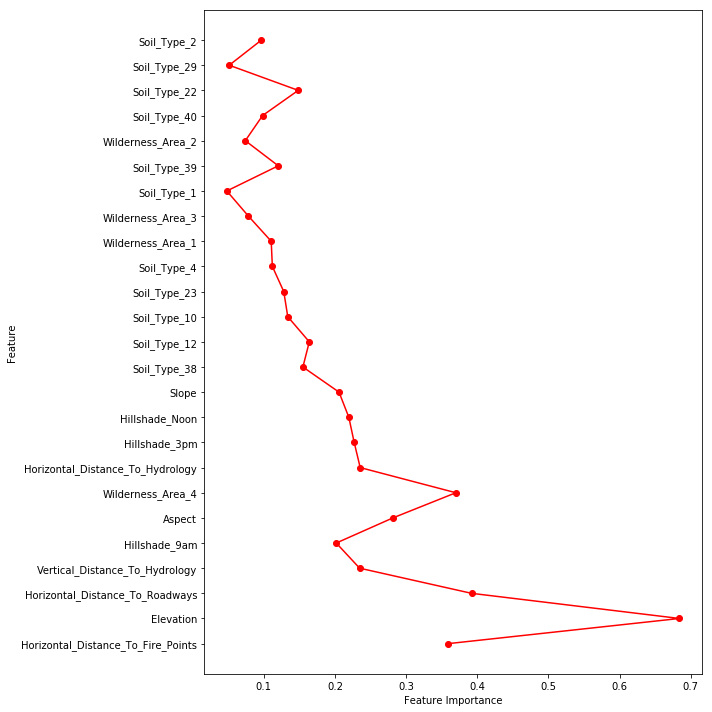

In [142]:
importances=avg_imp_10[111]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.plot(avg_imp_10[111],range(25),marker='o',color='r')
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.yticks(range(len(importances)), columnlabel)
plt.tight_layout()
plt.show()

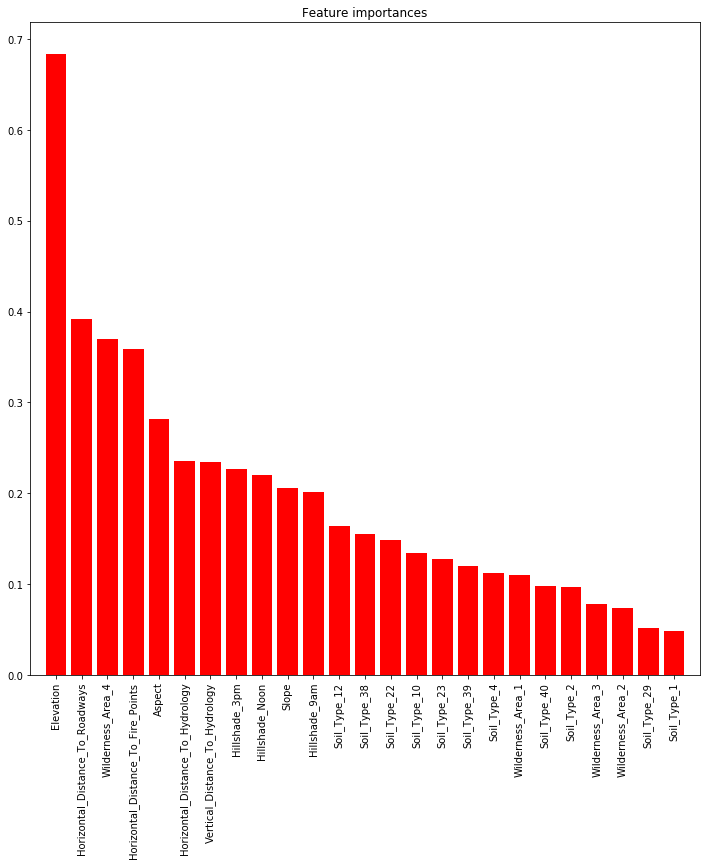

In [143]:

importances=avg_imp_10[111]
indices = np.argsort(importances)[::-1]
importances=np.sort(importances)[::-1]
temp=[columnlabel[i] for i in indices]

# Plot the feature importances of the forest
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances,
       color="r", align="center")
plt.xticks(range(len(importances)), temp,rotation='vertical')
plt.xlim([-1, len(importances)])
plt.ylim(ymin=0)
plt.show()

In [144]:
cnf_matrix = confusion_matrix(y_test, test_pre_forest_10[111],labels=range(1,8))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(1,8),
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[1117 4171    0    0    0    0    0]
 [ 155 6955    8    0    0    0    0]
 [   0  659  245    0    0    0    0]
 [   0   55    4    0    0    0    0]
 [   0  239    0    0    0    0    0]
 [   0  370   63    0    0    0    0]
 [  87  384    0    0    0    0   14]]


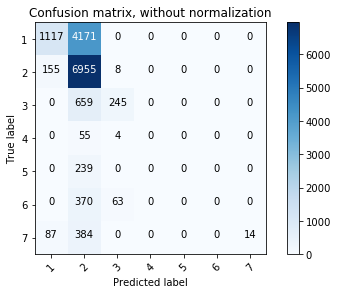

In [145]:
plt.show()

In [146]:
cnf_matrix = confusion_matrix(y_train, train_pre_forest_10[111],labels=range(1,8))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(1,8),
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[ 3902 12007     0     0     0     0     0]
 [  292 20887    11     0     0     0     0]
 [    0  1840   834     0     0     0     0]
 [    0   190    17     0     0     0     0]
 [    0   719     0     0     0     0     0]
 [    0  1178   140     0     0     1     0]
 [  206  1270     0     0     0     0    82]]


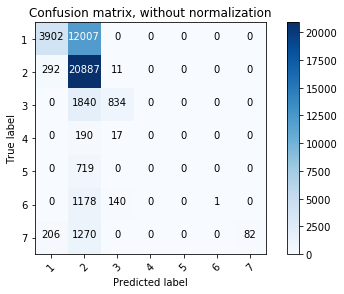

In [147]:
plt.show()